<a href="https://colab.research.google.com/github/hyesukim1/Video-game-sales-project/blob/main/%5B%EB%B0%9C%ED%91%9C%5D_Video_game_sales_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project1.다음 분기 게임 설계하기

##목차

###1. EDA_전처리
###2. 가설 검정 및 시각화
###3. 결론 및 게임 추천


---
**분석 목표**
>지역별, 회사별, 연도별 출고량이 높은 게임을 분석 후 다음분기 게임을 설계한다.

**가설 설정**
>가설1_지역별 선호하는 게임 장르가 다르다.  
>가설2_연도별 게임의 트렌드가 있다.

**분석 및 시각화**
>출고량이 높은 게임에 대한 분석 및 시각화

---

---



###EDA_전처리

1.결측치 및 데이터 타입 확인

2.Year 데이터 확인 후 두자리 숫자 4자리로 변경

3.판매 단위 M으로 통일 후 K단위 데이터 제거 



**1. 결측치 및 데이터 타입 확인**

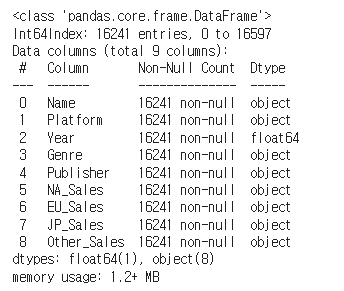

>Year, Unnamed를 제외한 모든 데이터를 object로 확인 했으며 가설 검정 및 시각화 진행 시 NA/EU/JP/Other Sales 데이터를 수치형으로 변경이 필요할 것으로 예상했다.

***

**2. Year 데이터 확인 후 4자리 수로 데이터 통일**

**3. 판매 단위 M으로 통일 후 K 단위 데이터 제거**

In [ ]:
#unnamed 컬럼 제거
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

#year데이터 2글자를 4글자로 수정
def year(x):
   if x <= 20:
     x += 2000
     return x
   elif x > 20 and x <= 100:
     x += 1900
     return x
   else:
     return x

df['Year'] = df['Year'].apply(year)

#판매 단위 M으로 수정 후 적용
def M(string):
  return str(string.replace('M',''))

df['NA_Sales'] = df['NA_Sales'].apply(M)
df['EU_Sales'] = df['EU_Sales'].apply(M)
df['JP_Sales'] = df['JP_Sales'].apply(M)
df['Other_Sales'] = df['Other_Sales'].apply(M)

#판매 단위가 미미한 K값은 제거
df = df[~df['NA_Sales'].str.contains("K")]
df = df[~df['EU_Sales'].str.contains("K")]
df = df[~df['JP_Sales'].str.contains("K")]
df = df[~df['Other_Sales'].str.contains("K")]

#판매단위 수치형으로 데이터 타입 변경
import pandas as pd
df['NA_Sales'] = df['NA_Sales'].apply(pd.to_numeric)
df['EU_Sales'] = df['EU_Sales'].apply(pd.to_numeric)
df['JP_Sales'] = df['JP_Sales'].apply(pd.to_numeric)
df['Other_Sales'] = df['Other_Sales'].apply(pd.to_numeric)

df['Global_Sales'] = df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum(axis=1)
df

>판매 단위 K는 미미한 값으로 데이터에 영향이 적을 것으로 판단하여 제거했습니다.  
>가설 검정 및 시각화를 위해 판매단위 데이터 수치형으로 변경 했습니다.  
>추후 분석을 위해 필요한 Global_Sales의 컬럼을 추가했고 EDA를 마무리했습니다.

***

### 가설 검정 및 시각화

####가설1_지역별 선호하는 게임 장르가 다르다.

>아노바 검정 시행
>>독립변수는 '장르' 종속변수는 '지역별 출고량'으로 두고 one-way Anova 검정으로 시행했습니다.
>>>HO: 지역에 따라서 선호하는 게임 장르가 같을것이다.  
>>>H1: 지역에 따라서 선호하는 게임 장르가 다를것이다.



In [ ]:
#아노바 테스트 진행: P값이 0.005이하로 귀무가설을 기각하고 대립가설을 채택

import scipy.stats as stats
import pandas as pd
import urllib
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
plt.rc('font', family='NanumBarunGothic') 
plt.rc('axes', unicode_minus=False)

df_melt = df.iloc[:,[5,6,7,8]]

df_melt1 = pd.melt(df_melt.reset_index(), id_vars=['index'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales','Other_Sales'])
df_melt1

F_statistic, pVal = stats.f_oneway(df['NA_Sales'],df['EU_Sales'],df['JP_Sales'],df['Other_Sales'])

print('아노바테스트 : F={0:.1f}, p={1:.10f}'.format(F_statistic, pVal))

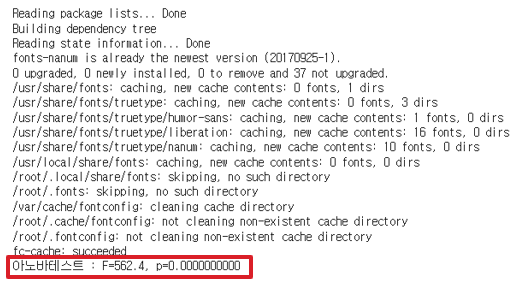

>아노바 테스트 결과 P값이 0.05이하로 귀무가설을 기각하고 대립가설인**'지역에 따라 선호하는 장르가 다를것이다.'**를 채택했습니다.

---

---






###그렇다면, **지역별로 게임 장르가 어떻게 다른 것인지** 시각화를 진행했습니다.

In [ ]:
df_Nas = pd.pivot_table(df,
                     index='Genre', 
                     values='NA_Sales', 
                     aggfunc=np.sum)
df_Nas1 = df_Nas.sort_values(by='NA_Sales',ascending=False)
df_Nas1.plot.bar(color='green', alpha=0.5)
plt.show()

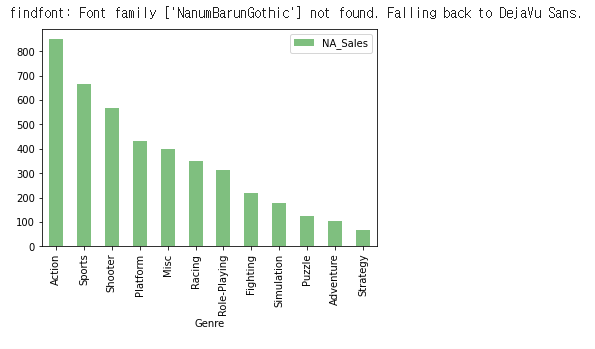

**미국**의 경우, **Action > Sports > Shooter** 순으로 게임 장르를 선호 

In [ ]:
df_Eus = pd.pivot_table(df,
                     index='Genre', 
                     values='EU_Sales', 
                     aggfunc=np.sum)
df_Eus1 = df_Eus.sort_values(by='EU_Sales',ascending=False)
df_Eus1.plot.bar(color='green', alpha=0.5)
plt.show()

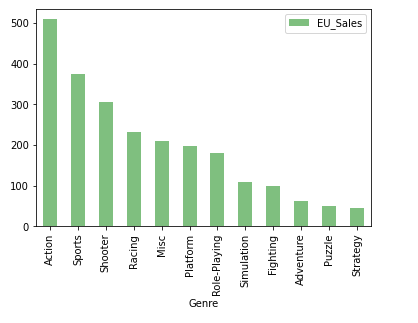

**유럽**의 경우, **Action > Sports > Shooter** 순으로 게임 장르를 선호 

In [ ]:
df_Jps = pd.pivot_table(df,
                     index='Genre', 
                     values='JP_Sales', 
                     aggfunc=np.sum)
df_Jps1 = df_Jps.sort_values(by='JP_Sales',ascending=False)
df_Jps1.plot.bar(color='green', alpha=0.5)
plt.show()

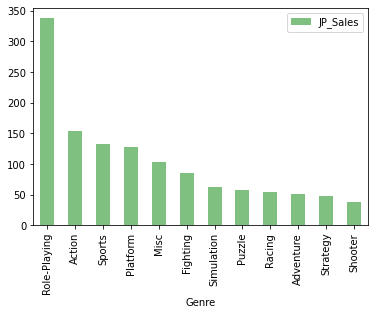

**일본**의 경우, **Role-Playing > Action > Platform** 순으로 게임 장르를 선호 

In [ ]:
df_other = pd.pivot_table(df,
                     index='Genre', 
                     values='Other_Sales', 
                     aggfunc=np.sum)
df_other1 = df_other.sort_values(by='Other_Sales',ascending=False)
df_other1.plot.bar(color='green', alpha=0.5)
plt.show()

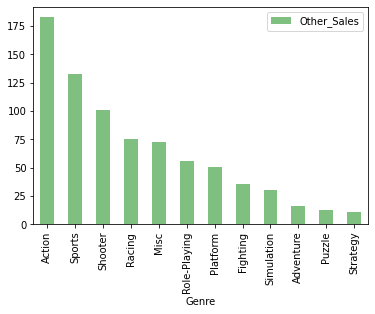

**그외 지역**의 경우, **Action > Sport > Shooter** 순으로 게임 장르를 선호 

####**지역별 Top3 게임 장르**

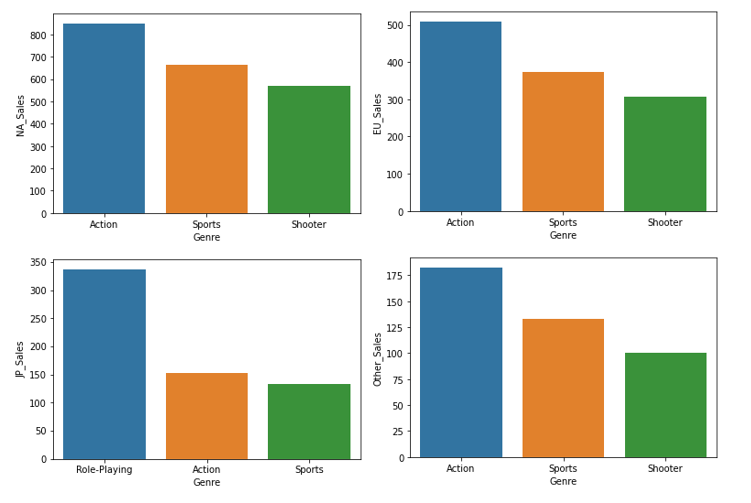

>요약하자면,
>**북미, 유럽, 그외 지역**은 **Action > Sport > Shooter** 순으로 판매량을 확인 할 수 있었고  
>**일본**의 경우 **Role-Playing > Action > Shooter**순으로 판매량이 다른것을 확인했으며  
>지역별 선호하는 게임의 종류가 다름을 확인했습니다.


---


***

### 가설 검정 및 시각화

####가설2_**연도별 게임의 트렌드가 있다.**



In [ ]:
#연도별 각 장르의 판매합계 확인
import matplotlib.pyplot as plt
%matplotlib inline

df_aff = df.groupby(by=['Year', 'Genre']).Global_Sales.sum().reset_index()
pivot_df = pd.pivot_table(df_aff,
                          index= 'Year', 
                          columns='Genre', 
                          values='Global_Sales', 
                          aggfunc='sum')
pivot_df.fillna(0)


pivot_df.plot.bar(stacked=True, figsize=(10,7))

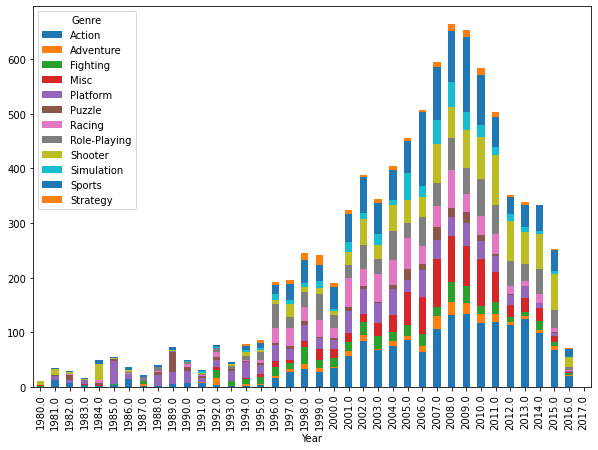

장르 별 글로벌 판매 합계를 연도 순으로 확인했으나 어떤 장르가 많이 판매되었는지 보기가 쉽지않아 시각화 재시도



---



In [ ]:
#년도별 세계 게임 구매량 추이 
df_aff = df.groupby(by=['Year', 'Genre']).Global_Sales.sum().reset_index()
sns.relplot(kind="line", data=df_aff, x="Year", y="Global_Sales", hue="Genre")

#장르별로 확인
sns.relplot(
    kind="line", data=df_aff, x="Year", y="Global_Sales", hue="Genre", 
    col="Genre", col_wrap=4)

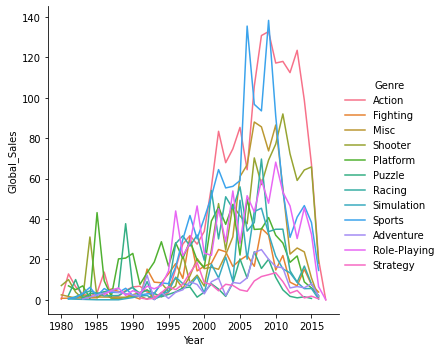
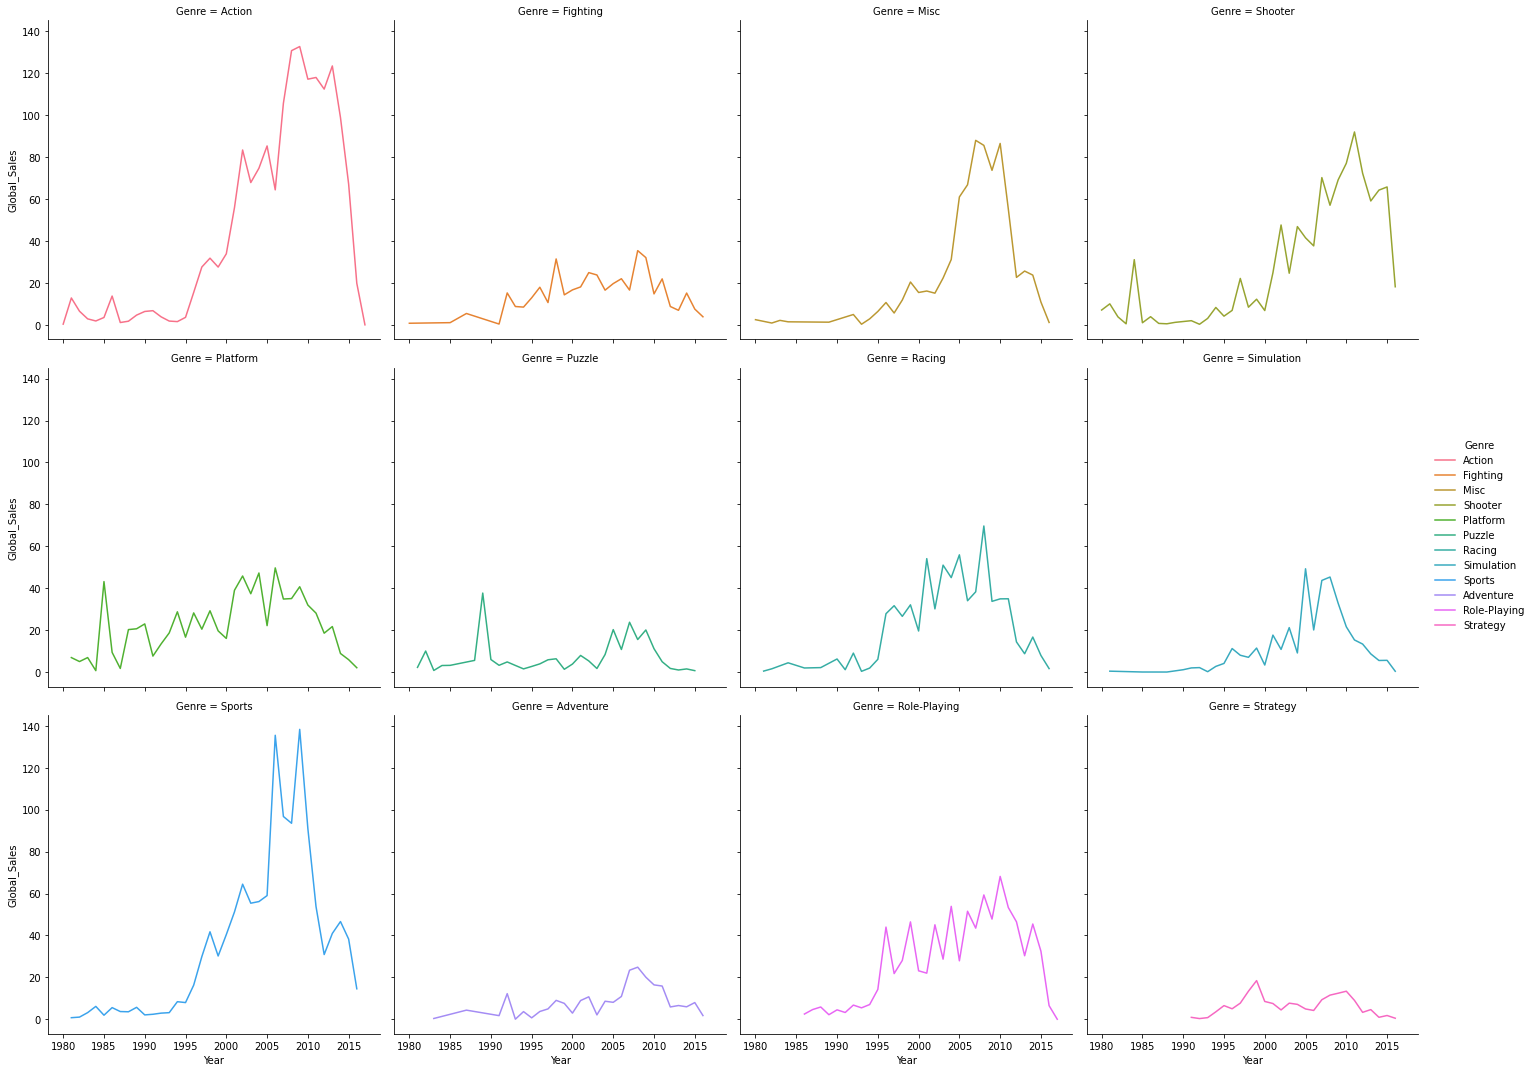


위에 2개의 그래프를 통해 확인한 결과 **Action**, **Sports** 가 연도별 구매량이 높은것으로 확인했습니다.

하지만, 위에 내용으로는 자세한 분석이 어려워 년도별로 최다 판매된 장르를 시각화를 진행했습니다.


---



####연도별 최고 판매량 기록한 장르

In [ ]:
# 연도별 최고 판매량 기록한 장르 데이터프레임 만들기
year_max_sales = df.groupby(['Year', 'Genre'])['Global_Sales'].sum().reset_index()
condition = year_max_sales['Global_Sales'] == year_max_sales.groupby(['Year'])['Global_Sales'].transform(max)
year_max_sales = year_max_sales[condition]
year_max_sales.columns = ['년도', '장르', '전세계 판매량']

# 장르 데이터 저장
genre = year_max_sales['장르'].values

# 그래프 그리기
plt.figure(figsize=(28,10))
ax = sns.barplot(x='년도', y='전세계 판매량', data=year_max_sales)
idx = 0
for value in year_max_sales['전세계 판매량']:
    ax.text(x=idx, y=value + 2, s=str(genre[idx] + '---' + ' ' + str(round(value, 2))),
            color='black', size=14, rotation=90, ha='center')
    idx += 1
ax.set_title('Year per Global Sales', y=1.06, fontsize=28, loc='left')
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Global Sales', fontsize=20)
plt.show()

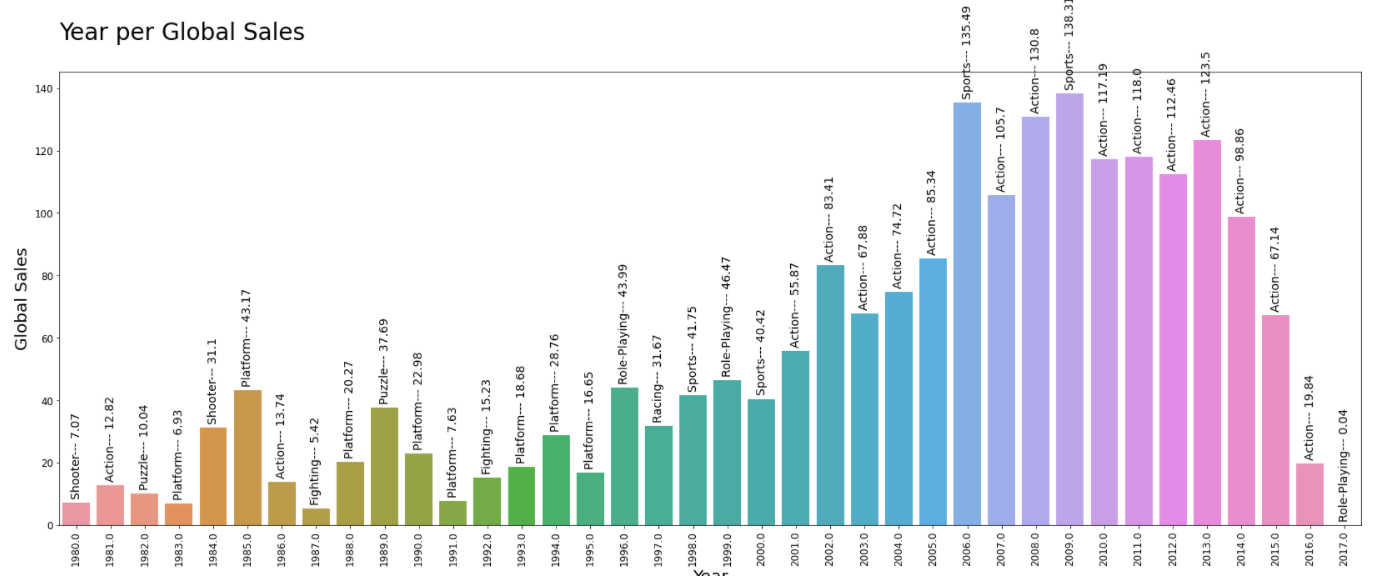

위의 그래프를 통해 연도별 인기있는 게임의 장르는 
데이터 년도 기준(2017년) 10년 이내에 판매량이 높은 게임 장르를 그래프를 확인한결과 **Action**장르가 가장 많은 것으로 확인하였습니다.

---

####지역별 플랫폼 기준 출고량 Top3

In [ ]:
#Platform_top3 데이터
P_NA_top = platform_top.loc[:, ['Platform','NA_Sales']]
P_NA_top1 = P_NA_top.sort_values(by=['NA_Sales'],ascending=False).head(3)

sns.barplot(
    data= P_NA_top1,
    x= "Platform",
    y= "NA_Sales"
)
plt.show()
)
plt.show()

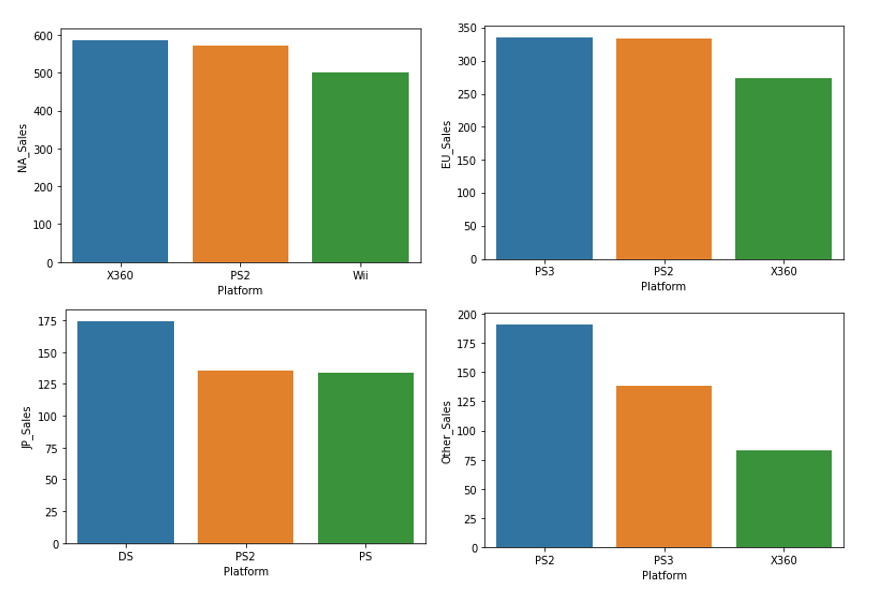

지역별 최다 출고량의 플랫폼은 **북미 'X360', 유럽'PS3', 일본'DS', 기타 지역 'PS2'**로 확인했습니다.

---

####회사별 출고량 Top 3

In [ ]:
#회사별 추가
publisher_top = df3.groupby('Publisher').sum().reset_index()
publisher_top.head()

Pu_NA_top = publisher_top.loc[:, ['Publisher','NA_Sales']]
Pu_NA_top1 = Pu_NA_top.sort_values(by=['NA_Sales'],ascending=False).head(3)

sns.barplot(
    data= Pu_NA_top1,
    x= "Publisher",
    y= "NA_Sales"
)
plt.show()

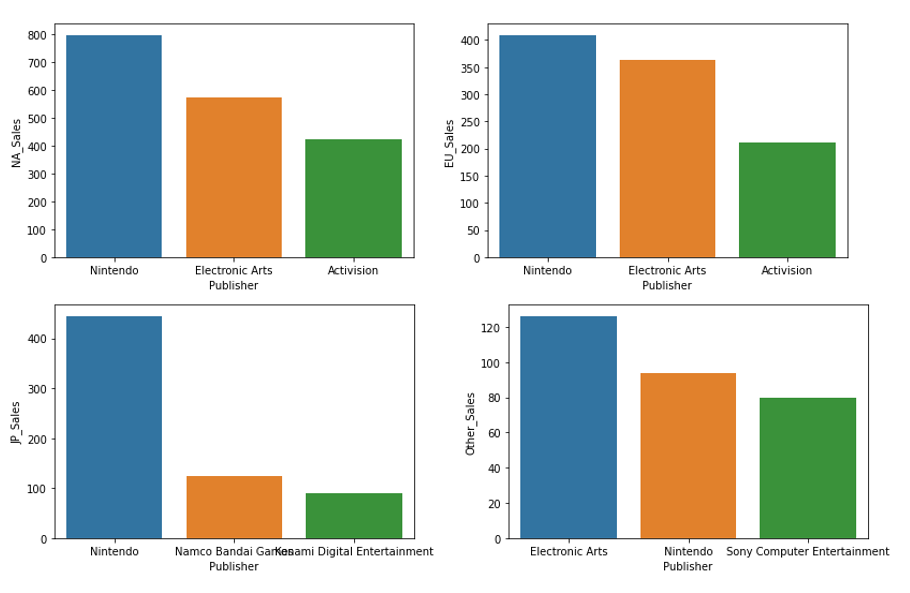

지역별 최다 출고량의 회사는 **북미 'Nintendo', 유럽'Nintendo', 일본'Nintendo', 기타 지역 'Electronic Arts'**로 확인했습니다.
***

###출고량이 높은 게임에 대한 분석 및 시각화

>게임별 글로벌 판매량 상위 10개 데이터 추출후 시각화 진행

In [ ]:
#게임별 글로벌 판매량 상위 10개 데이터 추출
df_game_name = df.loc[df.Global_Sales.sort_values(ascending=False).index].reset_index().head(10)
df_game_name #연도가 섞여있음(날짜 기준 넣고 수정 필요)


df_game_name_glo = df_game_name.iloc[:10,[1,10]]
df_game_name_glo

df_game_name_glo.plot.barh(x='Name', y='Global_Sales',  cmap='Pastel1')
plt.xlabel('Total Sales')
plt.ylabel('Game Name')
plt.show()

## 데이터 준비
labels = ['Wii Sports', 'Super Mario Bros', 'Mario Kart Will', 'Wii Sports Resort', 'Pokemon Red/Pokemon Blue'] ## 라벨
labels
frequency = [82,40,35,33,31] ## 빈도
 
fig = plt.figure(figsize=(8,8)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정

explode = [0.1,0,0,0,0]
plt.pie(frequency, ## 파이차트 출력
       explode = explode,
       labels=labels,
       shadow=True,
       startangle=90, ## 시작점을 90도(degree)로 지정
       textprops={'fontsize': 14},
       counterclock=False, ## 시계 방향으로 그린다.
       autopct=lambda p : '{:.2f}%'.format(p), ## 퍼센티지 출력
       colors = ['palevioletred','lightpink','pink','lavenderblush','snow']
       )

plt.title('Total top sales for game', fontsize=20)
plt.show()

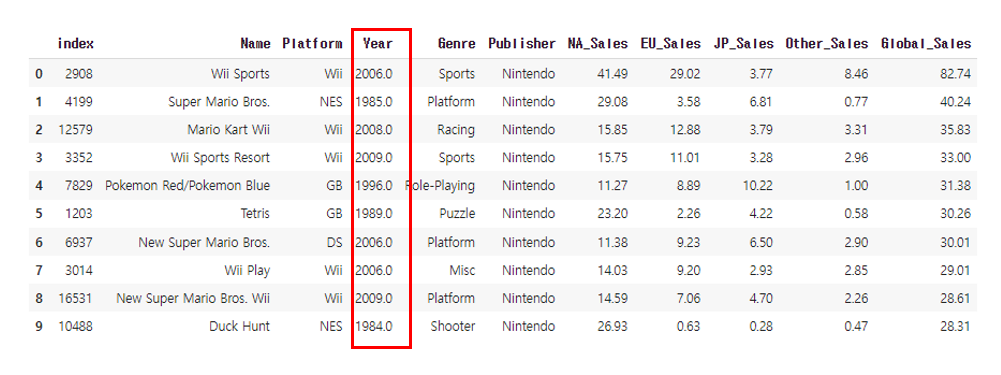

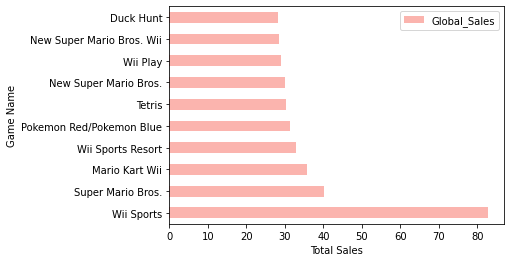

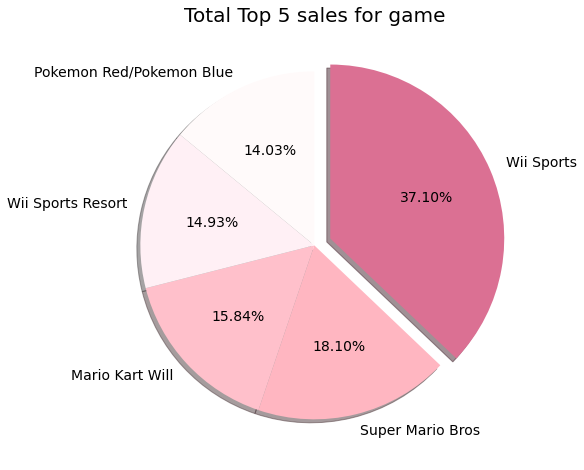

게임 판매량은 **Will Sports > Super Mario Bros > Mario Kart Wii** 순으로 높았으나 연도가 다양하게 분포되어있어 게임 판매량이 많아도 정확하다고 판단하기 어렵다고 느꼈습니다. 

따라서, 연도를 데이터 기준 5년내로 설정하여 시각화를 재진행했습니다.

In [ ]:
#2017년 기준으로 최신 5년내에 글로벌 판매량 상위 10개 게임 데이터 추출

df_game_name_glo_Y = df[df.Year >= 2013].sort_values('Global_Sales', ascending=False).head(10)
df_game_name_glo_Y = df_game_name_glo_Y.reset_index(drop=True)
df_game_name_glo_Y

df_game_name_glo_Y_cut= df_game_name_glo_Y.iloc[:10,[0,9]]
df_game_name_glo_Y_cut

df_game_name_glo_Y_cut.plot.barh(x='Name', y='Global_Sales', color='lightsteelblue')
plt.xlabel('Total Sales')
plt.ylabel('Game Name')
plt.show()

## 데이터 준비
labels = ['Grand Theft Auto V', 'Grand Theft Auto V', 'Call of Duty: Black Ops 3', 'Grand Theft Auto V', 'Pokemon Omega Ruby/Pokemon Alpha Sapphire'] ## 라벨
labels
colors = ['royalblue','cornflowerblue','lighskyblue','lightcyan','aliceblue']
colors = colors
frequency = [21,16,14,11,11] ## 빈도
 
fig = plt.figure(figsize=(8,8)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정

explode = [0.1,0,0,0,0]
plt.pie(frequency, ## 파이차트 출력
       explode = explode,
       labels=labels,
       shadow=True,
       startangle=90, ## 시작점을 90도(degree)로 지정
       textprops={'fontsize': 14},
       counterclock=False, ## 시계 방향으로 그린다.
       autopct=lambda p : '{:.2f}%'.format(p), ## 퍼센티지 출력
       colors = ['royalblue','cornflowerblue','lightskyblue','aliceblue','ghostwhite']
       )

plt.title('Total top sales for game', fontsize=20)
plt.show()

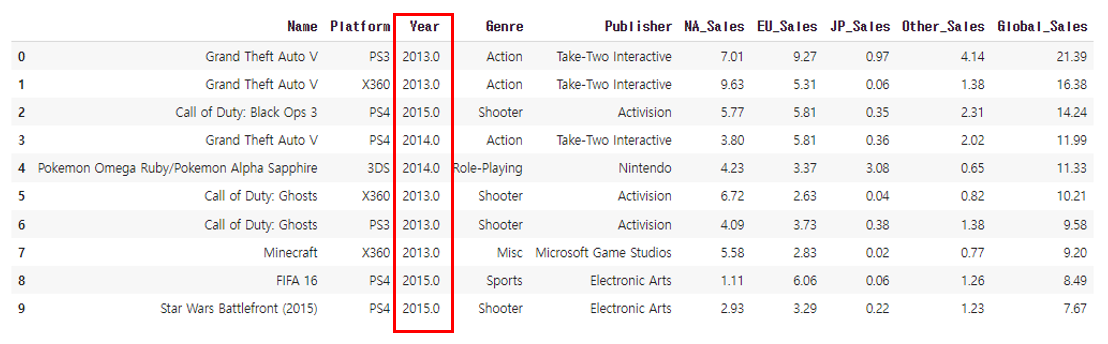

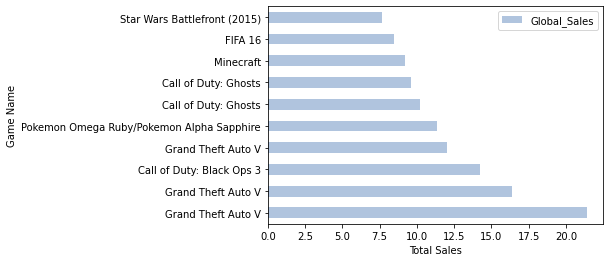

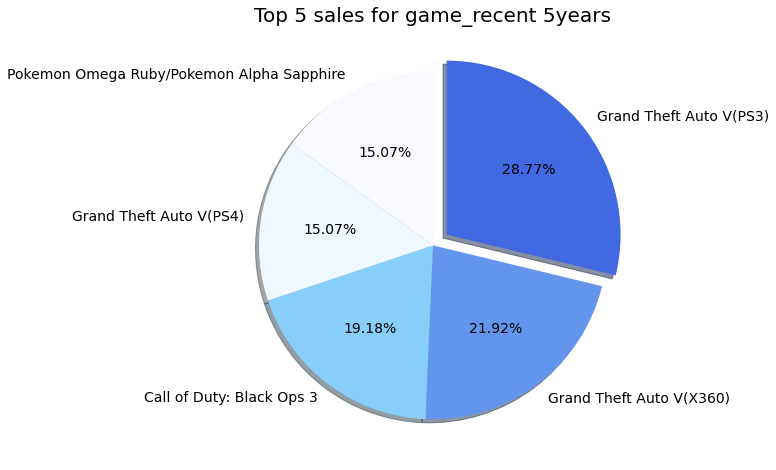

데이터 기준(2017년) 최신 5년 게임 최고 판매량을 확인한 결과 **Grand Theft Auto V(PS3) > Grand Theft Auto V(X360) > Call of Duty: Black Ops 3**순으로 **게임별 출고량**이 높은것을 확인했습니다. 

***

##**3. 결론 및 게임 추천**


---



---


##**요약**

####**장르별 판매량**
>**북미, 유럽, 그외 지역**은 **Action > Sport > Shooter**   
>**일본**의 경우 **Role-Playing > Action > Shooter**

####**연도별 트렌드**
>연도별 인기있는 게임의 장르는 데이터 기준(2017년도) **판매량이 높은 게임 장르**는 **Action**장르

####**출고량이 높은 게임**
>데이터 년도 기준(2017년) 최신 5년 출고량이 높은 게임  
>**Grand Theft Auto V(PS3/Action) > Grand Theft Auto V(X360/Action) > Call of Duty: Black Ops 3(PC/Shooter)**


---


####**결론**
>다음분기 설계 게임은  
>**NA 지역 플랫폼 X360의 액션장르 제안**  
>**EU 지역 플랫폼 Ps3의 액션장르 제안**  
>**JP 지역 플랫폼 DS의 롤플레잉 장르를 제안**


---

